# Table Extraction and OCR with OpenCV, PaddleOCR, and VietOCR

This notebook demonstrates how to:
1. Detect table structures using OpenCV
2. Detect text regions using PaddleOCR
3. Recognize text using VietOCR

## Import Libraries

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageEnhance
from vietocr.vietocr.tool.predictor import Predictor
from vietocr.vietocr.tool.config import Cfg
from PaddleOCR import PaddleOCR

# Import our table_ocr module
from table_ocr import extract_table, init_models

/Users/buidokhoinguyen/Desktop/PDFMiner-microservice/document-process-service/venv/lib/python3.9/site-packages/paddle/utils/cpp_extension/extension_utils.py:711: UserWarning: No ccache found. Please be aware that recompiling all source files may be required. You can download and install ccache from: https://github.com/ccache/ccache/blob/master/doc/INSTALL.md
  warnings.warn(warning_message)


## Initialize Models

In [2]:
# Initialize PaddleOCR and VietOCR models
recognitor, detector = init_models()

print("Models initialized successfully!")

Model weight /var/folders/zt/wcb31_zn5sqf6t7yyknhkl6r0000gn/T/vgg_transformer.pth exsits. Ignore download!
[2025/05/19 23:10:55] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/Users/buidokhoinguyen/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/Users/buidokhoinguyen/.paddleocr/whl/rec/latin/l

## Process a Sample Image

In [4]:
# Path to your table image
img_path = 'process_images/table_extractor/11_perspective_corrected_with_padding.jpg'  # Update with your image path

# Output directory
output_dir = './output/table_extraction'

Image found: process_images/table_extractor/11_perspective_corrected_with_padding.jpg


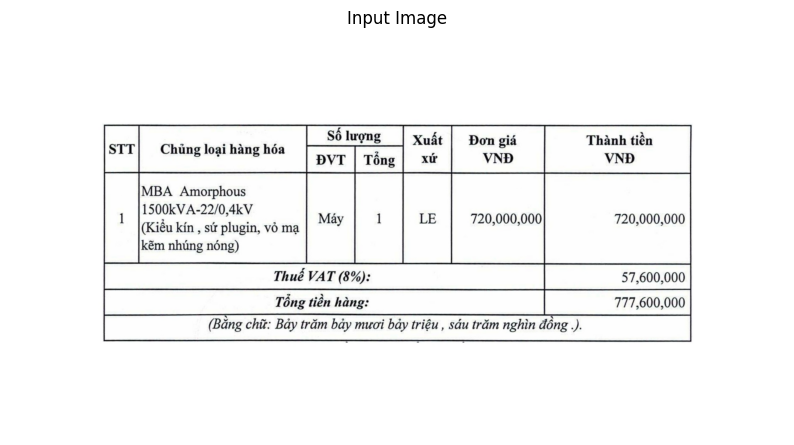

In [5]:
# Check if image exists
if os.path.exists(img_path):
    print(f"Image found: {img_path}")
    # Display the image
    plt.figure(figsize=(10, 10))
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.title("Input Image")
    plt.axis('off')
    plt.show()
else:
    print(f"Image not found: {img_path}")

## Extract Table and Recognize Text

In [6]:
# Extract tables with enhanced factor of 2.0
table_data, result_img_path = extract_table(img_path, output_dir, factor=2.0)

Model weight /var/folders/zt/wcb31_zn5sqf6t7yyknhkl6r0000gn/T/vgg_transformer.pth exsits. Ignore download!
[2025/05/19 23:13:11] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/Users/buidokhoinguyen/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/Users/buidokhoinguyen/.paddleocr/whl/rec/latin/l

## Display Results

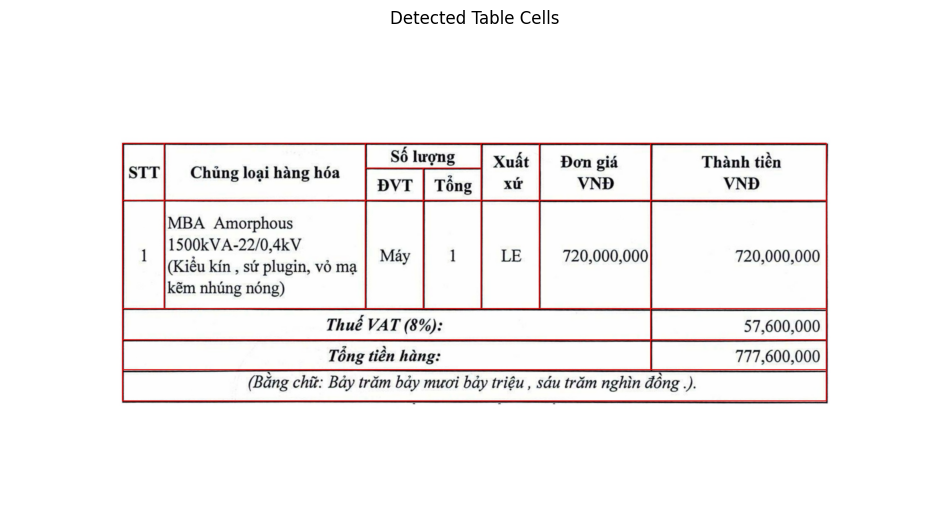

In [7]:
if result_img_path and os.path.exists(result_img_path):
    # Display result image
    plt.figure(figsize=(12, 12))
    result_img = cv2.imread(result_img_path)
    result_img_rgb = cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB)
    plt.imshow(result_img_rgb)
    plt.title("Detected Table Cells")
    plt.axis('off')
    plt.show()

In [8]:
# Display extracted text data
if table_data:
    print(f"Found {len(table_data)} cells in the table.\n")
    
    # Create a simple visualization of the table content
    for cell_data in table_data:
        print(f"Cell ID: {cell_data['cell_id']}")
        print(f"Position: {cell_data['position']}")
        print(f"Text: {cell_data['text']}")
        print("-" * 50)

Found 20 cells in the table.

Cell ID: 0
Position: [351, 350, 486, 533]
Text: STT
--------------------------------------------------
Cell ID: 1
Position: [482, 350, 1118, 533]
Text: Chủng loại hàng hóa
--------------------------------------------------
Cell ID: 2
Position: [1114, 350, 1482, 432]
Text: Số lượng
--------------------------------------------------
Cell ID: 3
Position: [1478, 350, 1665, 533]
Text: xứ Xuất
--------------------------------------------------
Cell ID: 4
Position: [1661, 350, 2015, 533]
Text: VNĐ Đơn giá
--------------------------------------------------
Cell ID: 5
Position: [2011, 350, 2567, 533]
Text: VNĐ Thành tiền
--------------------------------------------------
Cell ID: 6
Position: [1114, 428, 1300, 533]
Text: ĐVT
--------------------------------------------------
Cell ID: 7
Position: [1296, 428, 1482, 533]
Text: Tổng
--------------------------------------------------
Cell ID: 8
Position: [351, 529, 486, 873]
Text: 1
--------------------------------------

## Conclusion

This notebook demonstrates a complete implementation that:
1. Uses OpenCV to detect table structures
2. Uses PaddleOCR to detect text regions within each cell
3. Uses VietOCR to recognize the text content

This approach leverages the strengths of each library - OpenCV for structural detection, PaddleOCR for text region detection, and VietOCR for accurate Vietnamese text recognition.